In [278]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'NFLX.csv'

full_data = pd.read_csv(in_file, parse_dates =["Date"], index_col ="Date", dayfirst=True)

# Print the first few entries of the Netflix stock price data 
display(full_data.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-05,360.000000,363.390015,335.829987,341.179993,341.179993,13092800
2018-09-06,347.440002,356.000000,341.989990,346.459991,346.459991,13050200
2018-09-07,342.200012,355.750000,341.250000,348.679993,348.679993,9105800
2018-09-10,352.269989,352.500000,343.079987,348.410004,348.410004,5752200
2018-09-11,344.670013,356.149994,343.899994,355.929993,355.929993,6198100


In [279]:
#This code calculates the Moving Average for the last 100 windows (100 days) 
#of the stocks closing price and take the average for each of the window’s moving average.

close_px = full_data['Adj Close']
mavg = close_px.rolling(window=25).mean()

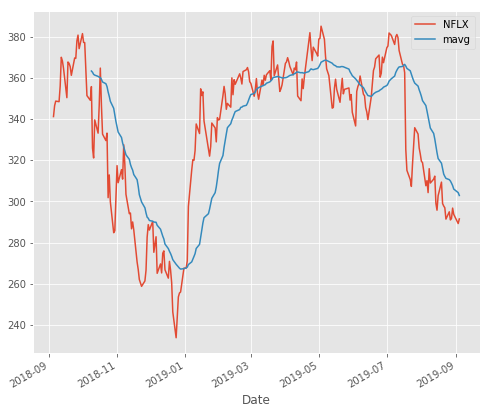

In [280]:
# We will now plot it out with Matplotlib and overlay the Moving Average with our Stocks Price Chart.

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='NFLX')
mavg.plot(label='mavg')
plt.legend()

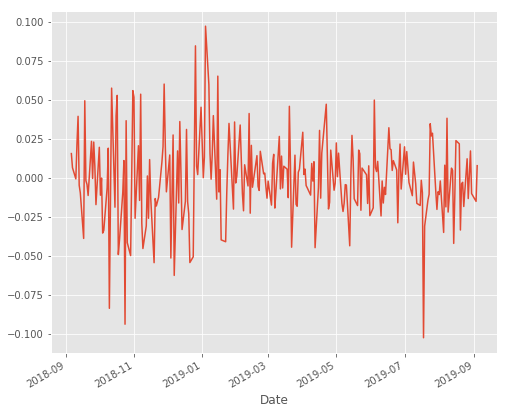

In [281]:
# Calculating expected return

rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')    # our ideal stocks should return as high and stable as possible

In [282]:
import pandas as pd
import glob
import os

# This peice of code creates a table with the adjusted closing price of some competitors 

path = r'C:\Users\s5831539\Stock-prediction' # use your path
all_files = glob.glob(path + "/*.csv") #collect all csv files in path 

li = []

#Using the date as the index get all closing prices only of the 5 target stocks and rename each column according to the file name

for filename in all_files:

    df = pd.read_csv(filename, parse_dates =["Date"], index_col ="Date", dayfirst=True, usecols=["Date","Adj Close"])    
    file = os.path.basename(filename)
    column_name = os.path.splitext(file)[0]
    df.columns = [column_name]
    li.append(df)
     
frame = pd.concat(li, axis=1, ignore_index=False)

In [283]:
retscomp = frame.pct_change()
corr = retscomp.corr()
corr

,AMZN,DIS,GOOGL,NFLX,T
AMZN,1.000000,0.427046,0.748540,0.709147,0.339810
DIS,0.427046,1.000000,0.456153,0.349253,0.378379
GOOGL,0.748540,0.456153,1.000000,0.618479,0.289604
NFLX,0.709147,0.349253,0.618479,1.000000,0.391560
T,0.339810,0.378379,0.289604,0.391560,1.000000


Text(0,0.5,'Returns Netflix')

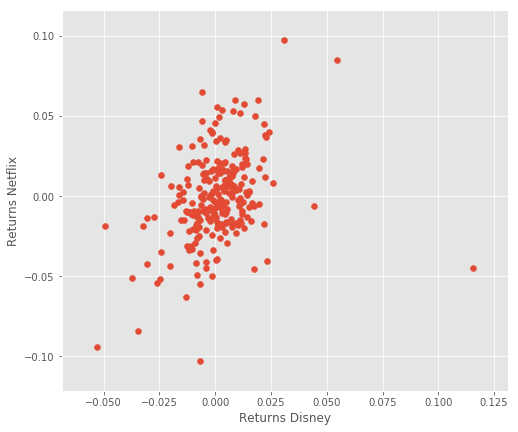

In [284]:
plt.scatter(retscomp.DIS, retscomp.NFLX)
plt.xlabel('Returns Disney')
plt.ylabel('Returns Netflix')

C:\Users\s5831539\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


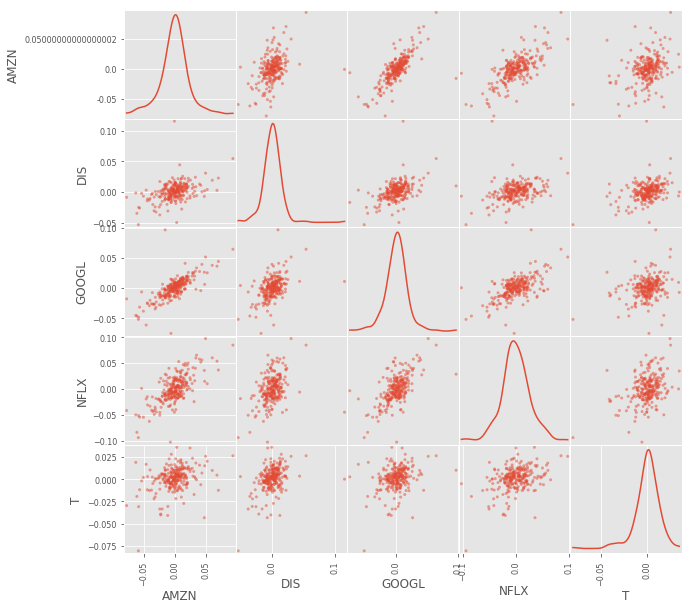

In [285]:
pd.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

([<matplotlib.axis.YTick at 0xcdd4780>,
 <a list of 5 Text yticklabel objects>)

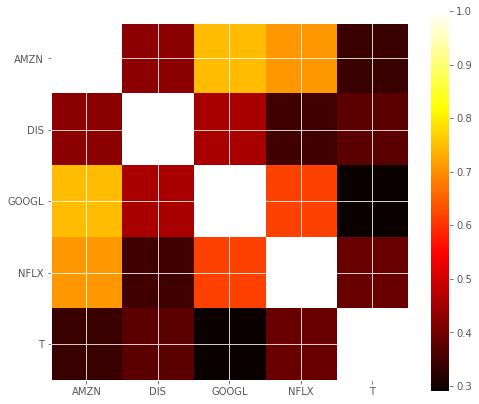

In [286]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

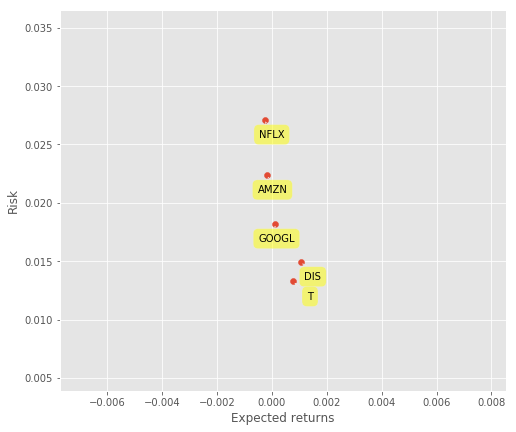

In [287]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [288]:
##Data Exploration
#Calculating descriptive statistics about the Netflix stock prices

Stock_prices = full_data['Adj Close']

#Minimum stock price
minimum_price = np.min(Stock_prices)

#Maximum price 
maximum_price = np.max(Stock_prices)

#Mean price
mean_price = np.mean(Stock_prices)

#Median price 
median_price = np.median(Stock_prices)

#Standard deviation 
std_price = np.std(Stock_prices)

# Show the calculated statistics
print("Statistics for Netflix data:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Netflix data:

Minimum price: $233.88000499999998
Maximum price: $385.02999900000003
Mean price: $335.5487642828686
Median price $349.190002
Standard deviation of prices: $35.345777735386825


In [289]:
#feature engineering
full_data_reg = full_data.loc[:,['Adj Close','Volume']]
full_data_reg['HL_PCT'] = (full_data['High'] - full_data['Low']) / full_data['Close'] * 100.0
full_data_reg['PCT_change'] = (full_data['Close'] - full_data['Open']) / full_data['Open'] * 100.0

In [290]:
#importing necessary libraries
import math
from sklearn import preprocessing

#replacing missing values. With most machine learning classifiers, extreme outliers are often ignored in the end as 
#their own data point. Because of this, what many people will do is take any NaN data, and replace it with a value of, 
#say, -99999. This is because, after pre-processing the data, you generally want to convert all features to a range 
#of -1 to positive 1. A data point that is -99999 is a clear and obvious outlier to almost any classifier.
full_data_reg.fillna(value=-99999, inplace=True)

#Selecting 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(full_data_reg)))

#Adding the label we want to predict and shifting the index axis by the number of data points we want to predict
forecast_col = 'Adj Close'
full_data_reg['label'] = full_data_reg[forecast_col].shift(-forecast_out)
X = np.array(full_data_reg.drop(['label'], 1))

#Scaling the data - Standardization of datasets is a common requirement for many machine learning estimators implemented 
#in scikit-learn; they might behave badly if the individual features do not more or less look like standard 
#normally distributed data: Gaussian with zero mean and unit variance.
X = preprocessing.scale(X)

X_late = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(full_data_reg['label'])
y = y[:-forecast_out]

In [291]:
# Importing 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
      
    score = r2_score(y_true, y_predict)  
    
    # Return the score
    return score

In [292]:
#importing necessary sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [293]:
#Splitting the data in the test and training sets. 20% used for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [303]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

#Decision Tree regression
clf_dtreg = DecisionTreeRegressor()
clf_dtreg.fit(X_train, y_train)

# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

#Trying higher order polynomials

#polynomial Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

#polynomial Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)   

# Ridge Regression
clfridge = Ridge(alpha=1.0)
clfridge.fit(X_train, y_train)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [304]:
# Score returns the coefficient of determination R^2 of the prediction for the linear model
regscore = clfreg.score(X_test, y_test)
dtregscore = clf_dtreg.score(X_test, y_test)
polyscore2 = clfpoly2.score(X_test,y_test)
polyscore3 = clfpoly3.score(X_test,y_test)
knnscore = clfknn.score(X_test, y_test)
ridgescore = clfridge.score(X_test, y_test)

print("The linear regression score: ",regscore)
print("The decision tree regression score: ",dtregscore)
print("The polynomial regression 2 score: ",polyscore2)
print("The polynomial regression 3 score: ",polyscore3)
print("The knn regression score: ",knnscore)
print("The ridge regression score: ",ridgescore)

The linear regression score:  0.8382319132190463
The decision tree regression score:  0.659730389307642
The polynomial regression 2 score:  0.8573221891348671
The polynomial regression 3 score:  0.4486824769815482
The knn regression score:  0.8114840328739855
The ridge regression score:  0.839873068690983


In [296]:

#Importing 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

# this function will be used to train the model using the grid search technique to optimize the 'max_depth' and min_samples_split'
#parameters for the decision tree to see whether it's score can surpass the score produced by the linear model

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    cv_sets = ShuffleSplit(n_splits=5, random_state=0, test_size=0.20, train_size=None)

    #Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    #Creates a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)
             ,'min_samples_split':range(2,12)} 

    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()

    grid =  GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [297]:
# Fit the training data to the model using grid search
clf_dtreg = fit_model(X_train, y_train)

# Produce the value for 'max_depth' and 'min_samples_split'
print("Parameter 'max_depth' is {} for the optimal model.".format(clf_dtreg.get_params()['max_depth']))
# Produce the value for 'min_samples_split'
print("Parameter 'min_samples_split' is {} for the optimal model.".format(clf_dtreg.get_params()['min_samples_split']))

Parameter 'max_depth' is 2 for the optimal model.
Parameter 'min_samples_split' is 2 for the optimal model.


In [298]:
#Decision Tree regression
clf_dtreg = DecisionTreeRegressor(random_state=0, max_depth=2)
clf_dtreg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [299]:
dtregscore = clf_dtreg.score(X_test, y_test)
print("The decision tree regression score: ",dtregscore)

The decision tree regression score:  0.738236640548921


In [311]:
#Printing the predicted prices using the best performning classifier 
forecast_set = clfpoly2.predict(X_late)
full_data_reg['Forecast'] = np.nan
print(forecast_set, polyscore2, forecast_out)

[296.04122026 291.11408784 293.47902109] 0.8573221891348671 3


In [312]:
import datetime

last_date = full_data_reg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    full_data_reg.loc[next_date] = [np.nan for _ in range(len(full_data_reg.columns)-1)]+[i]

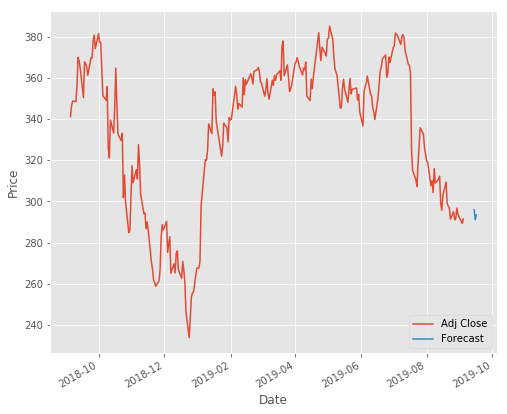

In [313]:
#Visualizing the result 
full_data_reg['Adj Close'].tail(500).plot()
full_data_reg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#### 